In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from win32com.client import Dispatch

In [3]:
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

In [4]:
# rede neural

#     o    tipo de flor
#   /  \   w1, w2 , b
#  o    o  length , width

In [5]:
def sigmoid(x):
    #funcao sigmoid (0 e 1)
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    #derivada de sigmoid
    return sigmoid(x) * (1-sigmoid(x))

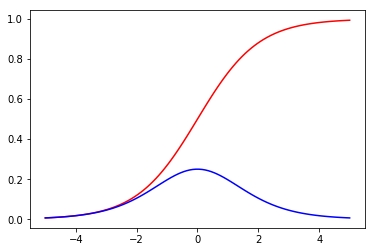

In [6]:
T = np.linspace(-5, 5, 100)

# grafico de sigmoid
plt.plot(T,sigmoid(T), c='r')

# grafico da derivada (slope)
fig = plt.plot(T,sigmoid_p(T), c='b')

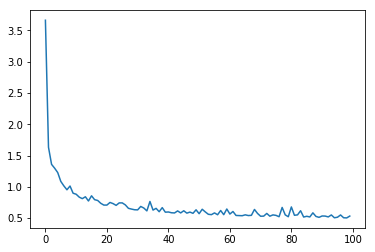

In [71]:
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

iterations = 10000
learning_rate = 0.1
costs = [] 

for i in range(iterations):
    # get a random point
    ri = np.random.randint(len(data))
    point = data[ri]

    # NN = m1 * w1 + m2 * w2 + b
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z) # predição da rede neural

    target = point[2]

    # custo do ponto randomico
    cost = np.square(pred - target)

    # a cada 1k iteraçoes ele printa
    if i % 100 == 0:
        c = 0
        for j in range(len(data)):
            p = data[j]
            p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
            c += np.square(p_pred - p[2])
        costs.append(c)

    dcost_dpred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)

    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1

    dcost_dz = dcost_dpred * dpred_dz

    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db

    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db

fig = plt.plot(costs)

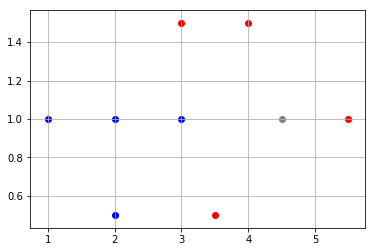

In [8]:
# desenho da data
def view_data():
    plt.grid()
    for i in range(len(data)):
        point = data[i]
        color = "r"
        if point[2] == 0:
            color = "b"
        plt.scatter(point[0], point[1], c=color)
    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

view_data()

In [9]:
#observando a predição do nosso modelo

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print("pred : {}".format(pred))

[3, 1.5, 1]
pred : 0.7215300036499477
[2, 1, 0]
pred : 0.10842617542609334
[4, 1.5, 1]
pred : 0.9721335344178581
[3, 1, 0]
pred : 0.6208333348936851
[3.5, 0.5, 1]
pred : 0.7915201147629987
[2, 0.5, 0]
pred : 0.07136583929933382
[5.5, 1, 1]
pred : 0.9990826471540638
[1, 1, 0]
pred : 0.008951660805208745


In [10]:
# predição da flor misteriosa

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("perto de 0 -> azul, perto de 1 -> vermelho")

0.9877885555938564
perto de 0 -> azul, perto de 1 -> vermelho


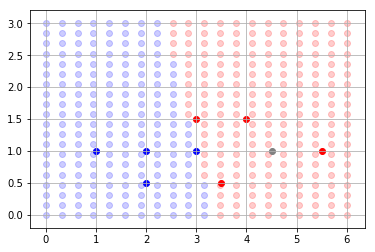

In [72]:
# verifica a predição da rede neural em plano cartesiano
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# mostra os pontos em cima da predição da rede neural
# se voce ver metade azul, e a outra vermelha, significa que
# a predição de dados está muito bem!
view_data()

In [31]:
speak = Dispatch("SAPI.SpVoice")

def which_flower(lenght, width):
    z = lenght * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred < .5:
        speak.Speak("Azul")
        print("Azul")
    else:
        speak.Speak("Vermelho")
        print("Vermelho")

In [73]:
which_flower(3, 1)

Azul
